In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.signal import savgol_filter
plt.rcParams['figure.figsize'] = (16,5)

/tmp/ipykernel_1836/3673097685.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  score = torch.load(file_name, map_location='cpu')


score1 mean: 0.37226716  std: 0.017513873
score2 mean: 0.39276788  std: 0.011783923


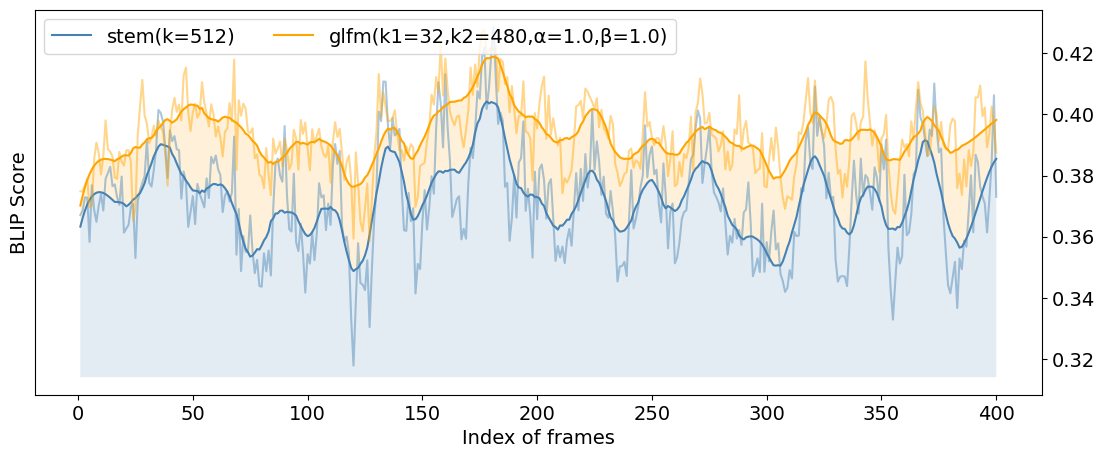

In [2]:
# ----------------------------- BLIP Score -----------------------------
def process_score_smooth(file_name):
    score = torch.load(file_name, map_location='cpu')
    score = score.squeeze(-1).detach().numpy()
    score_smooth = savgol_filter(score, window_length=31, polyorder=3)
    return score, score_smooth

root = 'blip_score_fold/'
setting = 'stem_woman_running_512_400frms_k_512'
score5, score5_smooth = process_score_smooth(f'{root}/{setting}/sim_every_frame.pt')
setting = 'glfm_woman_running_512_400frms_k1_32_k2_480'
score6, score6_smooth = process_score_smooth(f'{root}/{setting}/sim_every_frame.pt')
x = list(range(1,len(score5)+1))

plt.rcParams['figure.figsize'] = (13,5)
plt.rcParams['font.size'] = 14
ax = plt.gca()  
ax.yaxis.set_ticks_position('right')
plt.plot(x, score5, alpha=0.45, color='steelblue')
plt.plot(x, score5_smooth, label='stem(k=512)', color='steelblue')
plt.plot(x, score6, alpha=0.45, color='orange')
plt.plot(x, score6_smooth, label='glfm(k1=32,k2=480,α=1.0,β=1.0)', color='orange')
plt.fill_between(x,y1=score6_smooth,y2=score5_smooth,facecolor='orange', alpha=0.15)
plt.fill_between(x,score5_smooth,y2=0.314,facecolor='steelblue', alpha=0.15)
plt.legend()
plt.ylabel('BLIP Score')
plt.xlabel('Index of frames')
plt.legend(loc='upper left', ncol=2)

plt.savefig(f'{root}/blip_score.pdf')
# plt.close()
print('score1 mean:', np.mean(score5), ' std:', np.std(score5))
print('score2 mean:', np.mean(score6), ' std:', np.std(score6))

In [3]:
# setting = 'type7_k1_64_k2_448_0.6_1.0'
# tmp1, tmp1_smooth = process_score_smooth(f'{root}/{setting}/sim_every_frame.pt')
# setting = 'type7_k1_128_k2_384_0.6_1.0'
# tmp2, tmp2_smooth = process_score_smooth(f'{root}/{setting}/sim_every_frame.pt')
# print('tmp1 mean:', np.mean(tmp1), ' std:', np.std(tmp1))
# print('tmp2 mean:', np.mean(tmp2), ' std:', np.std(tmp2))

/tmp/ipykernel_1836/3673097685.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  score = torch.load(file_name, map_location='cpu')


score1 mean: 30.124096  std: 1.5177298
score2 mean: 30.124096  std: 1.5177298


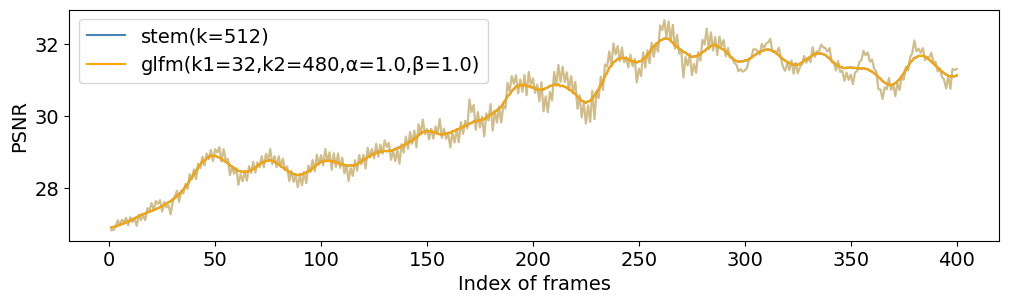

In [4]:
# --------------------------- PSNR ------------------------
plt.rcParams['figure.figsize'] = (12,3)
root = 'psnr_fold'
setting = 'stem_512_k_512_400frms'
score1, score1_smooth = process_score_smooth(f'{root}/{setting}/psnr_every_frame.pt')
setting = 'glfm_512_k1_32_k2_480_1.0_1.0_400frms'
score2, score2_smooth = process_score_smooth(f'{root}/{setting}/psnr_every_frame.pt')
x = list(range(1,len(score1)+1))

plt.plot(x, score1, alpha=0.4, color='steelblue')
plt.plot(x, score1_smooth, label='stem(k=512)', color='steelblue')
plt.plot(x, score2, alpha=0.4, color='orange')
plt.plot(x, score2_smooth, label='glfm(k1=32,k2=480,α=1.0,β=1.0)', color='orange')
plt.legend()
plt.ylabel('PSNR')
plt.xlabel('Index of frames')
plt.savefig(f'{root}/psnr.pdf')
# plt.close()
print('score1 mean:', np.mean(score1), ' std:', np.std(score1))
print('score2 mean:', np.mean(score2), ' std:', np.std(score2))

/tmp/ipykernel_1836/3673097685.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  score = torch.load(file_name, map_location='cpu')


score1 mean: 0.6868907  std: 0.026720706
score2 mean: 0.6868907  std: 0.026720706


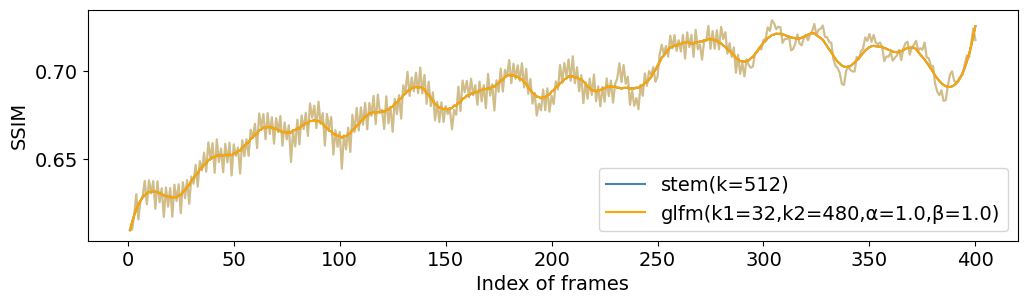

In [5]:
# --------------------------- SSIM ------------------------
root = 'ssim_fold'
setting = 'stem_512_k_512_400frms'
score3, score3_smooth = process_score_smooth(f'{root}/{setting}/ssim_every_frame.pt')
setting = 'glfm_512_k1_32_k2_480_1.0_1.0_400frms'
score4, score4_smooth = process_score_smooth(f'{root}/{setting}/ssim_every_frame.pt')
x = list(range(1,len(score3)+1))

plt.plot(x, score3, alpha=0.4, color='steelblue')
plt.plot(x, score3_smooth, label='stem(k=512)', color='steelblue')
plt.plot(x, score4, alpha=0.4, color='orange')
plt.plot(x, score4_smooth, label='glfm(k1=32,k2=480,α=1.0,β=1.0)', color='orange')
plt.legend()
plt.ylabel('SSIM')
plt.xlabel('Index of frames')
plt.savefig(f'{root}/ssim.pdf')
# plt.close()
print('score1 mean:', np.mean(score3), ' std:', np.std(score3))
print('score2 mean:', np.mean(score4), ' std:', np.std(score4))

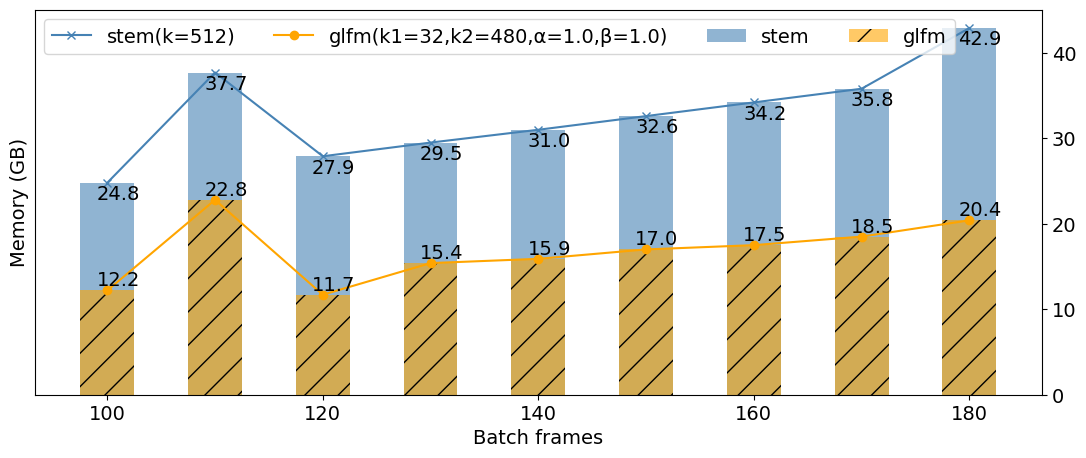

In [6]:
# -------------------------- Memory with different batch size -------------------
plt.rcParams['figure.figsize'] = (13,5)
plt.rcParams['font.size'] = 14
ax = plt.gca()  
ax.yaxis.set_ticks_position('right')
x_b = [100,110,120,130,140,150,160,170,180]
y1 = [12.2,22.8,11.7,15.4,15.9,17.0,17.5,18.5,20.4]
y2 = [24.8,37.7,27.9,29.5,31.0,32.6,34.2,35.8,42.9]
plt.bar(x_b,y2, label='stem', color='steelblue', alpha=0.6, width=5)
plt.bar(x_b,y1, label='glfm', color='orange', alpha=0.6, width=5, hatch='/')
plt.plot(x_b,y2,marker='x',label='stem(k=512)', color='steelblue')
plt.plot(x_b,y1,marker='o',label='glfm(k1=32,k2=480,α=1.0,β=1.0)',color='orange')

for i in range(len(x_b)):
    plt.text(x_b[i]-1,y1[i]+0.5, str(y1[i]))
    plt.text(x_b[i]-1,y2[i]-2, str(y2[i]))
plt.xlabel('Batch frames')
plt.ylabel('Memory (GB)')
plt.legend(loc='upper left', ncol=4)
plt.savefig('mem.pdf')